In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import torch

import scSLAT
from scSLAT.model import run_SLAT_multi,load_anndatas, Cal_Spatial_Net, run_SLAT, scanpy_workflow, spatial_match
from scSLAT.viz import match_3D_multi, build_3D, hist, Sankey, match_3D_celltype
from scSLAT.metrics import region_statistics

In [3]:
sc.set_figure_params(dpi=150, dpi_save=150)

In [4]:
adata1 = sc.read_h5ad('./adata1.h5ad')
adata2 = sc.read_h5ad('./adata2.h5ad')

In [5]:
embd0 = pd.read_csv('./seurat_embd0.csv')
embd1 = pd.read_csv('./seurat_embd1.csv')
embd0 = torch.from_numpy(embd0.to_numpy())
embd1 = torch.from_numpy(embd1.to_numpy())

In [12]:
best, index, distance = spatial_match([embd0, embd1], smooth=False, reorder=False)
matching = np.array([range(index.shape[0]), best])

In [13]:
adata1_df = pd.DataFrame({'index':range(embd0.shape[0]),
                          'x': adata1.obsm['spatial'][:,0],
                          'y': adata1.obsm['spatial'][:,1],
                          'celltype':adata1.obs['annotation']})
adata2_df = pd.DataFrame({'index':range(embd1.shape[0]),
                          'x': adata2.obsm['spatial'][:,0],
                          'y': adata2.obsm['spatial'][:,1],
                          'celltype':adata2.obs['annotation']})
matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]
region_statistics(best_match, start=0.5, number_of_interval=10)

0.500~0.550        17          0.170%
0.550~0.600        54          0.540%
0.600~0.650       207          2.070%
0.650~0.700       427          4.270%
0.700~0.750       805          8.049%
0.750~0.800      1224         12.239%
0.800~0.850      1563         15.628%
0.850~0.900      1768         17.678%
0.900~0.950      2309         23.088%
0.950~1.000      1626         16.258%


/rd2/user/xiacr/SLAT/scSLAT/viz/multi_dataset.py:242: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 18 cell types; dataset2: 22 cell types; 
                    Total :29 celltypes; Overlap: 11 cell types 
                    Not overlap :[['Surface ectoderm', 'Branchial arch', 'Head mesenchyme', 'Sclerotome', 'Dermomyotome', 'Spinal cord', 'Inner ear', 'Mucosal epithelium', 'Epidermis', 'Kidney', 'Mesentery', 'Cartilage primordium', 'Choroid plexus', 'Muscle', 'Pancreas', 'Ovary', 'Sympathetic nerve', 'Mesothelium']]
Subsample 300 cell pairs from 10001


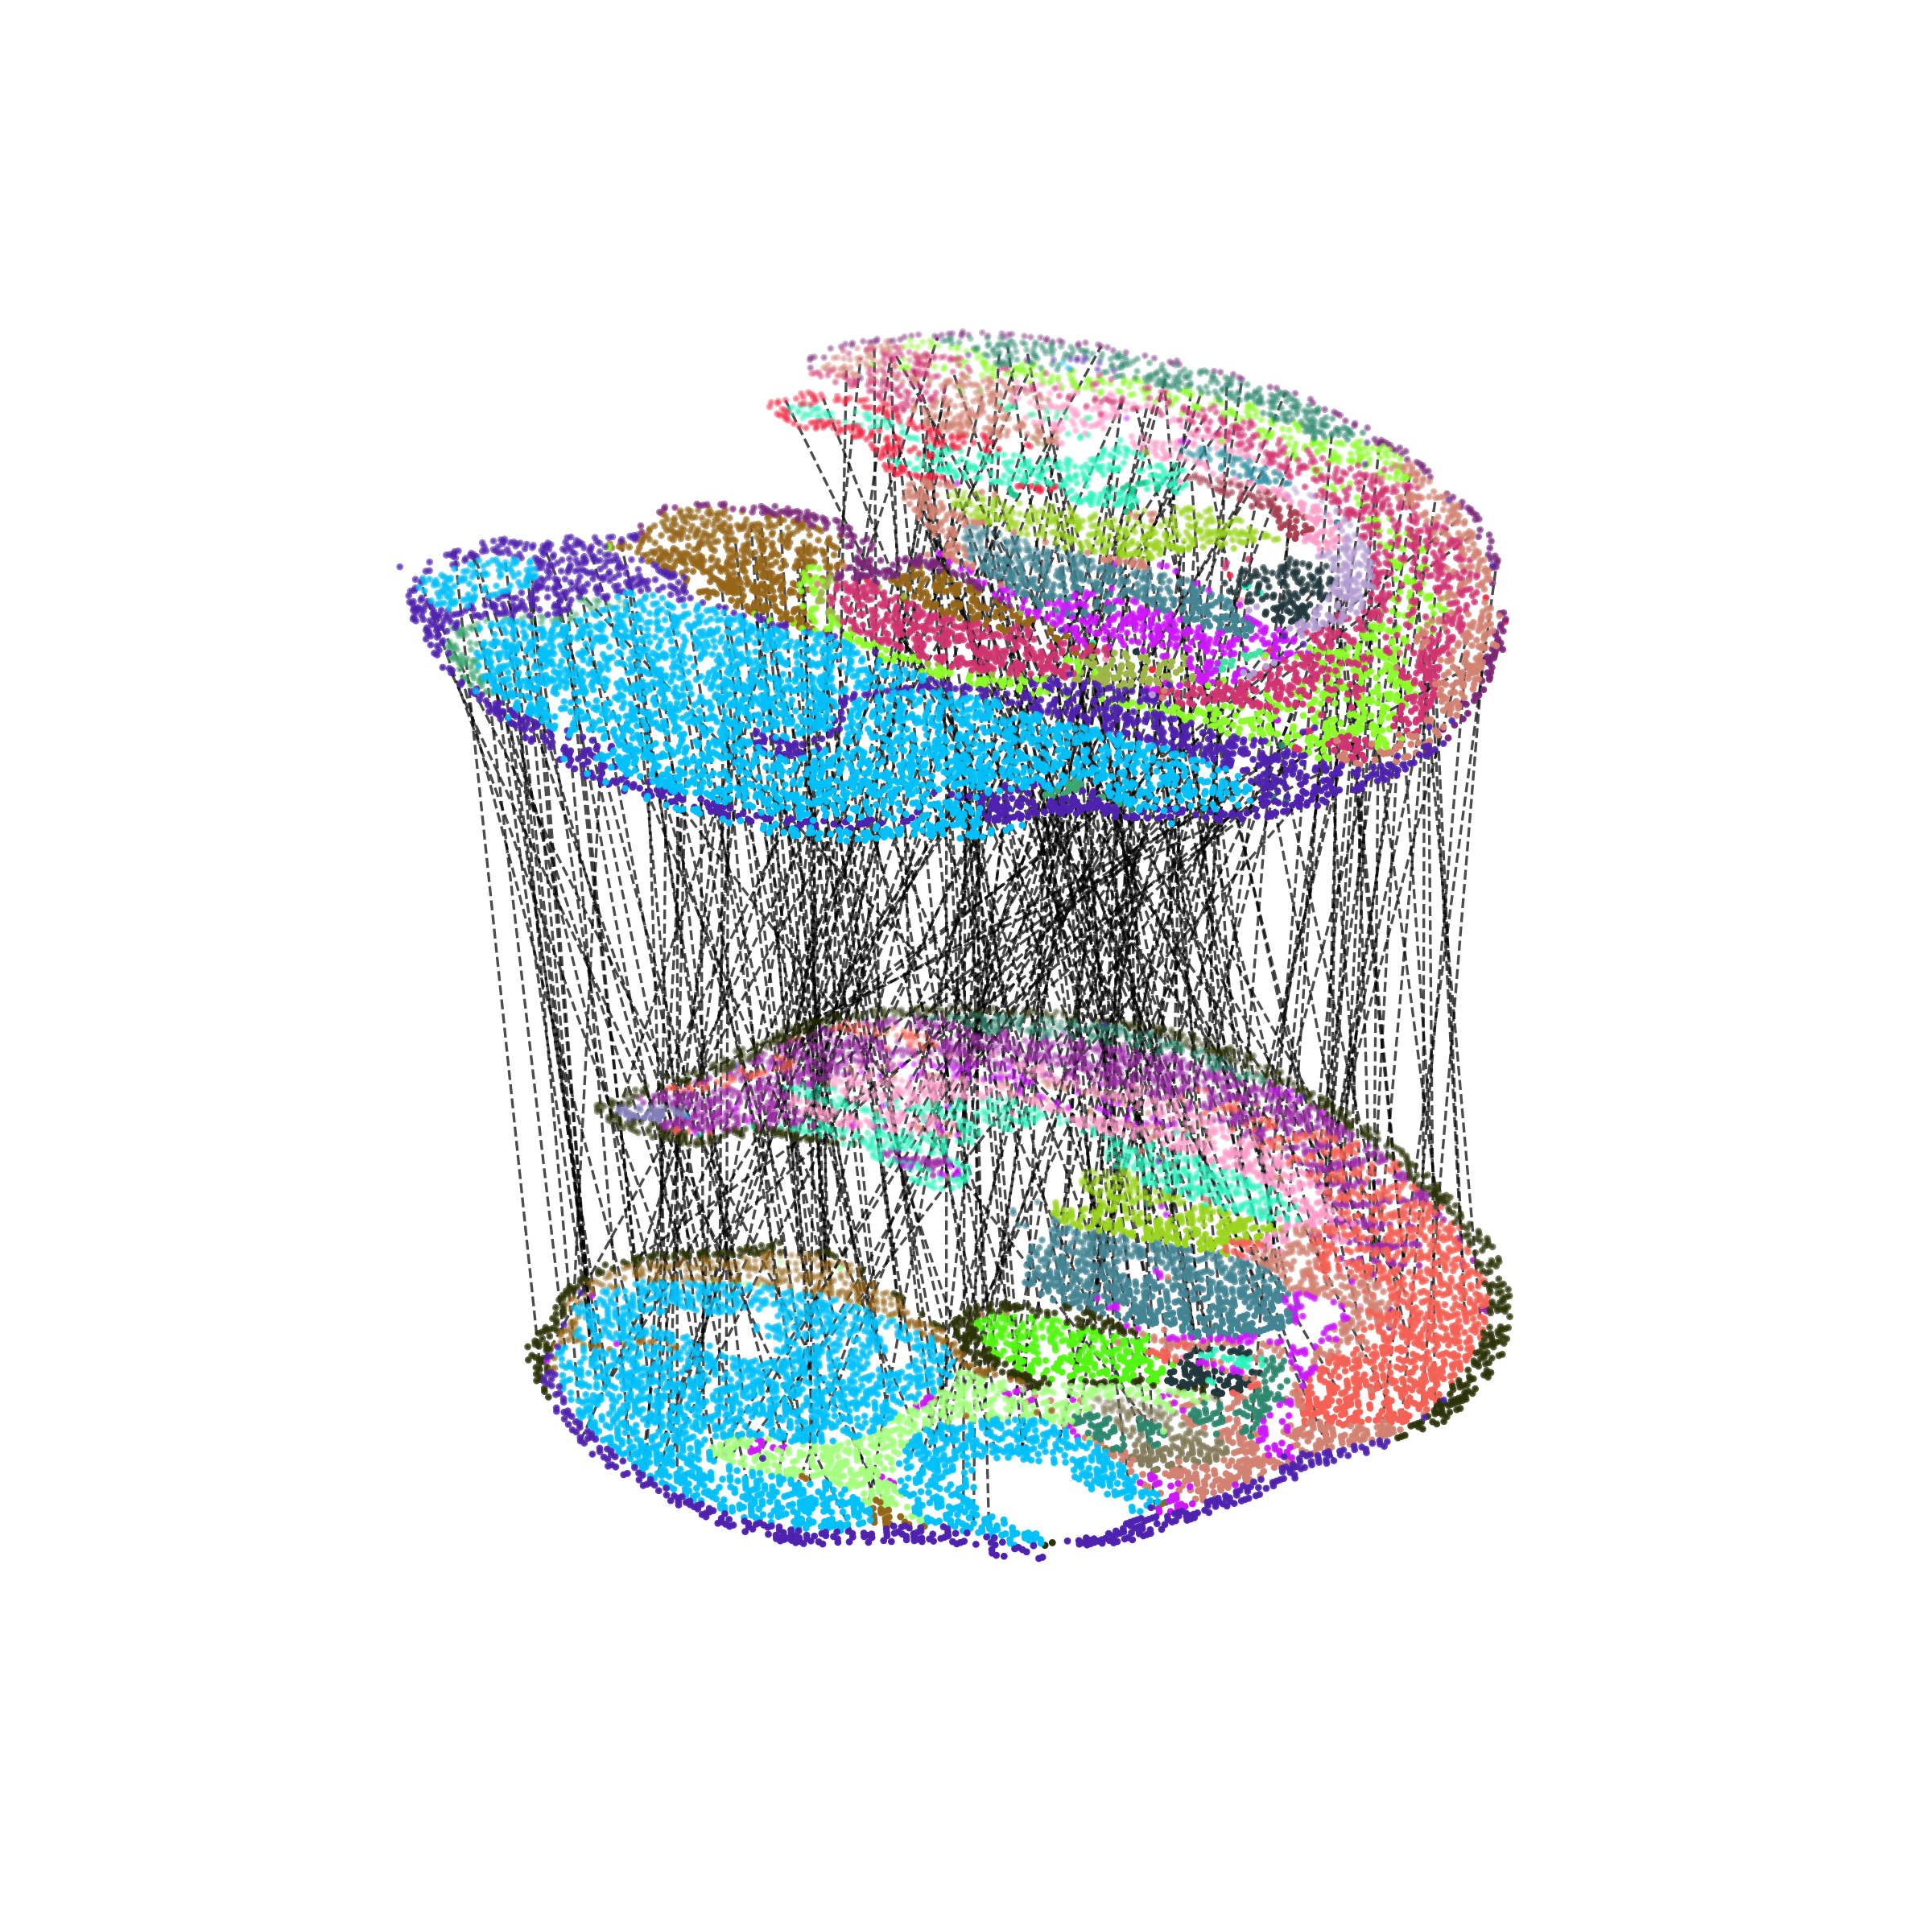

In [14]:
all_match = match_3D_multi(adata1_df, adata2_df, matching, meta='celltype',
                              scale_coordinate=True, subsample_size=300)

all_match.draw_3D(size=[10, 12], line_width=0.8, point_size=[1.2, 1.2],
                  line_color='black', show_error=False, hide_axis=True)

In [9]:
all_celltypes = np.unique(adata1.obs['annotation']).tolist()

/rd2/user/xiacr/SLAT/scSLAT/viz/multi_dataset.py:242: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.celltypes = set(self.dataset_A[meta].append(self.dataset_B[meta]))


dataset1: 18 cell types; dataset2: 22 cell types; 
                    Total :29 celltypes; Overlap: 11 cell types 
                    Not overlap :[['Surface ectoderm', 'Branchial arch', 'Head mesenchyme', 'Sclerotome', 'Dermomyotome', 'Spinal cord', 'Inner ear', 'Mucosal epithelium', 'Epidermis', 'Kidney', 'Mesentery', 'Cartilage primordium', 'Choroid plexus', 'Muscle', 'Pancreas', 'Ovary', 'Sympathetic nerve', 'Mesothelium']]
Subsample 10000 cell pairs from 10001


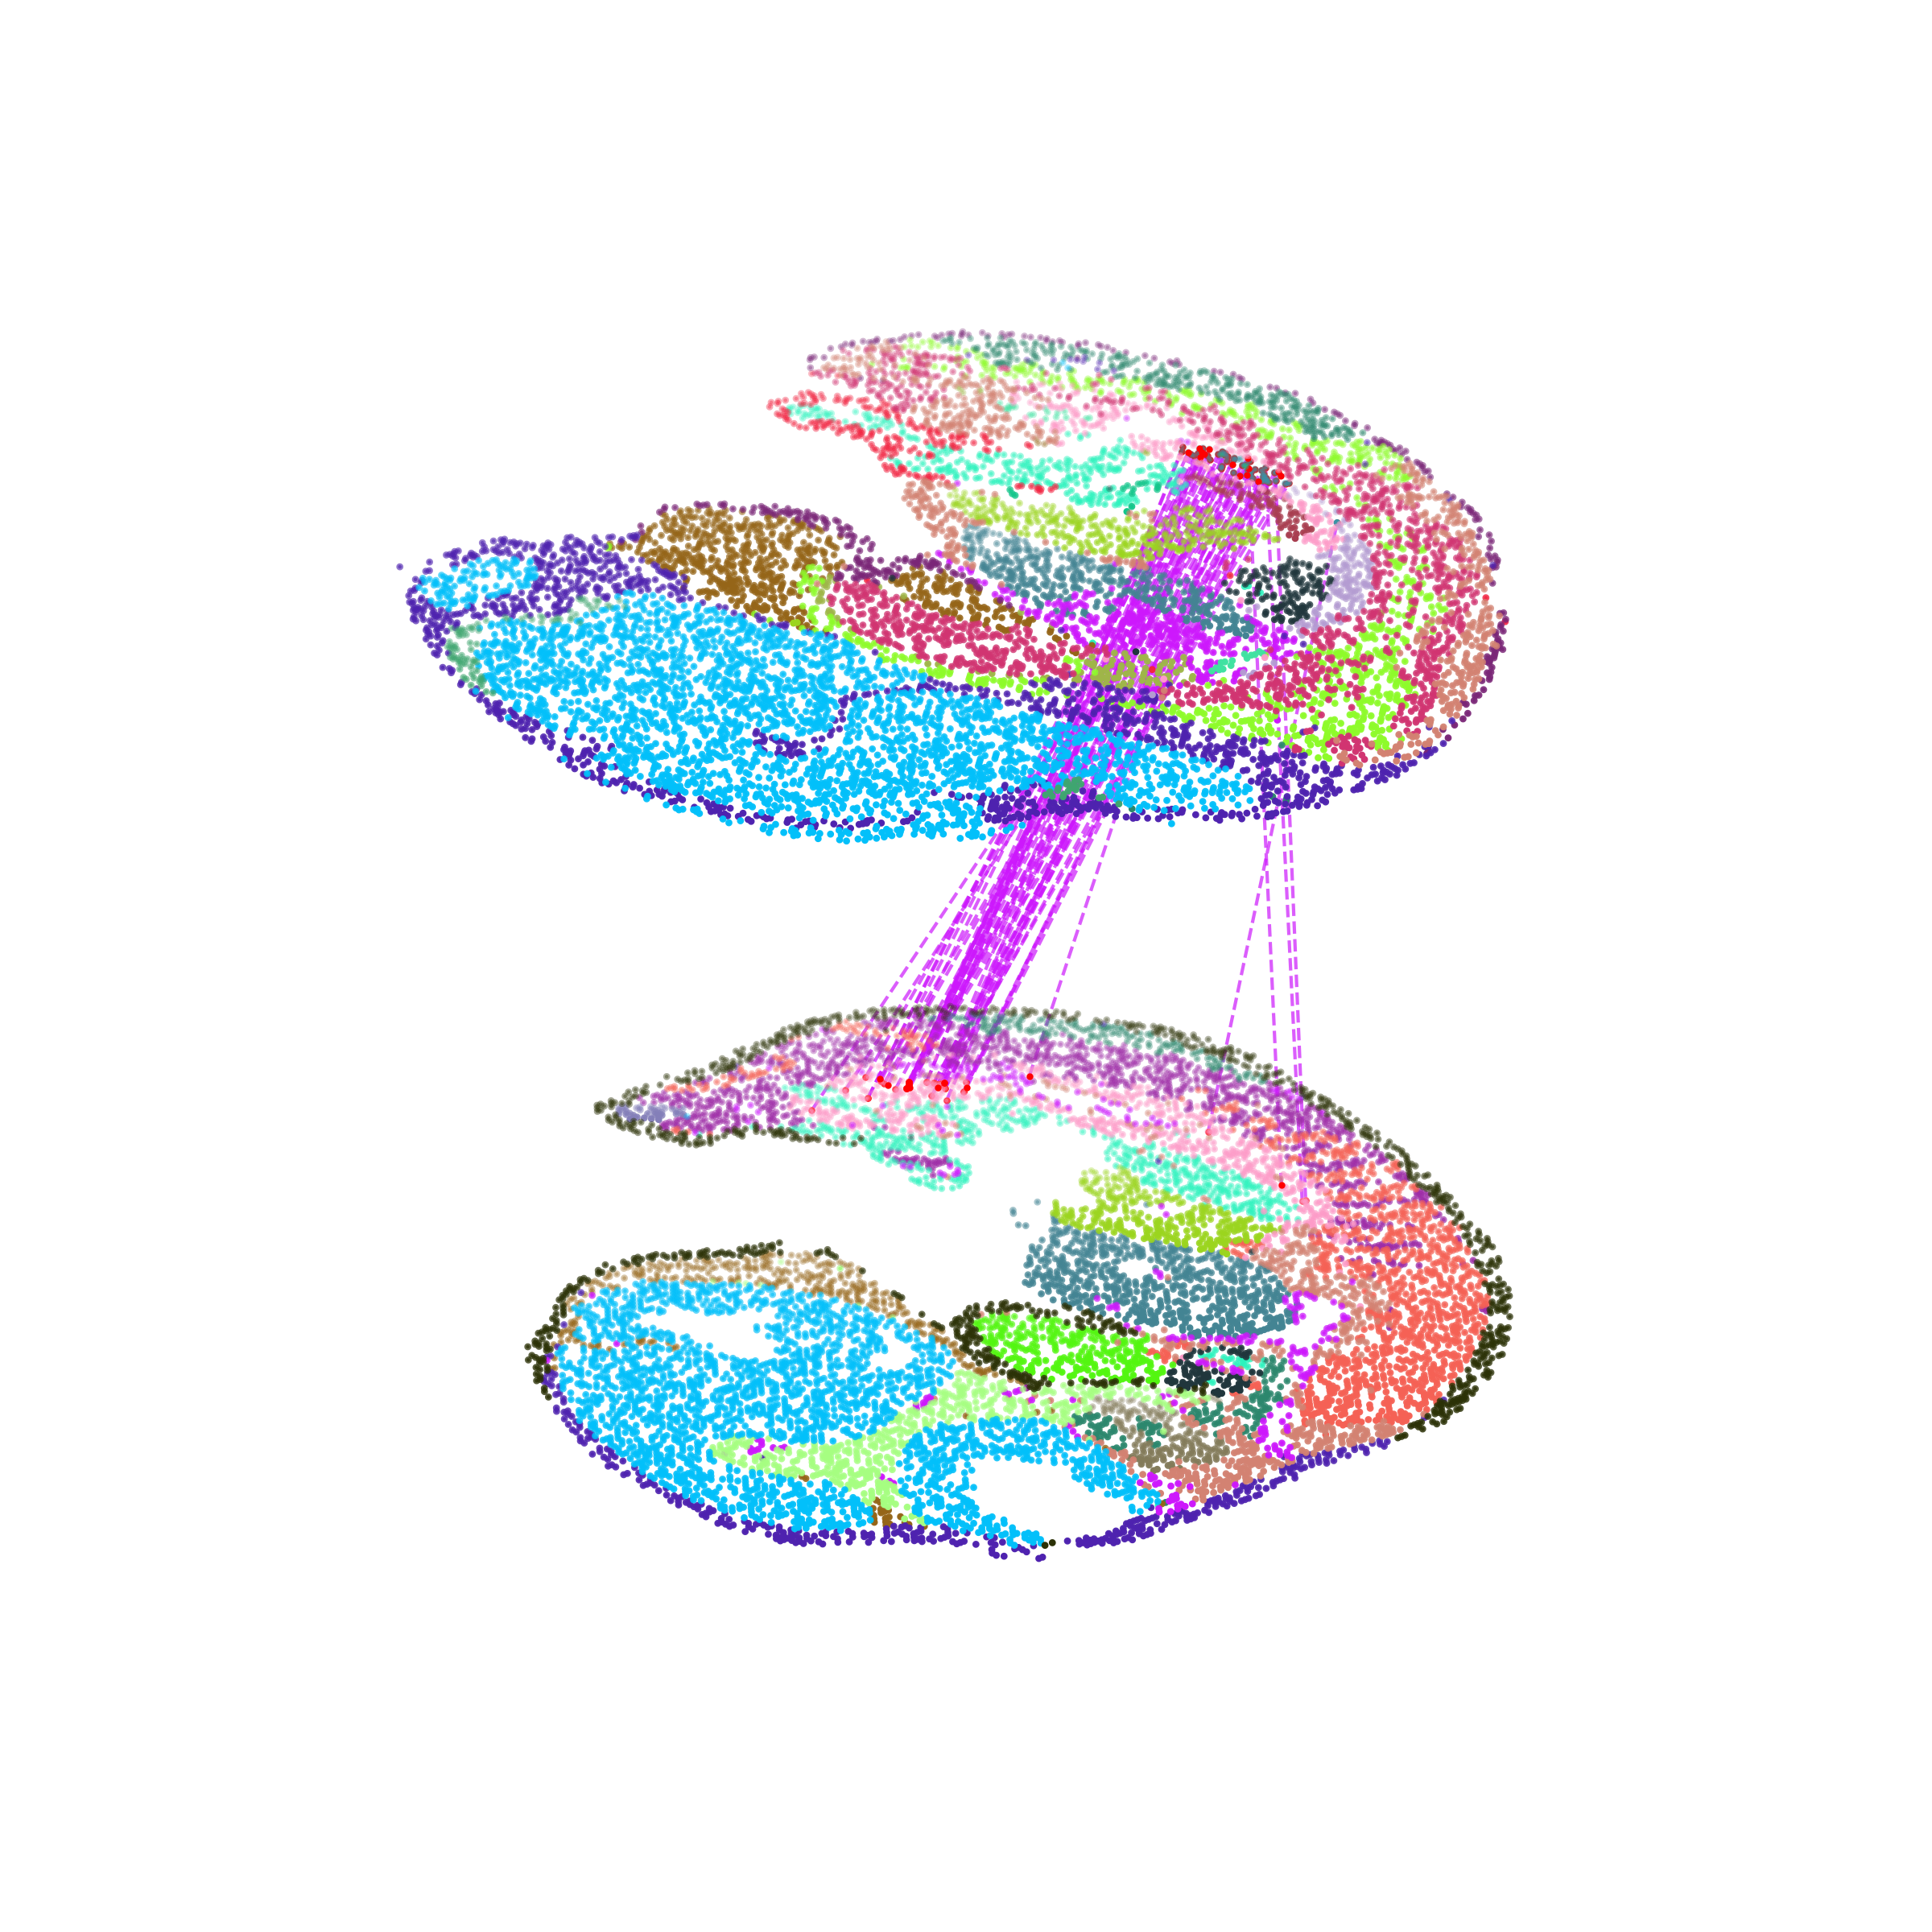

In [18]:
kidney_match = match_3D_celltype(adata1_df, adata2_df, matching, meta='celltype',
                                highlight_celltype=[['Urogenital ridge'], ['Kidney']],
                                scale_coordinate=True,
                                subsample_size=10000, highlight_cell=['red'])
kidney_match.draw_3D(size=[10, 12], line_width=1, point_size=[1.2,1.2], hide_axis=True)